In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
# for moving focus to element
from selenium.webdriver import ActionChains
# for scrolling down
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Chrome Browser와 Chrome Driver Version 확인하기 
chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),options=chrome_options)
# White Rhone Valley × Bordeaux
driver.get('https://www.vivino.com/explore?e=eJwdikEKwjAUBW_zlpJqBTdvIXoD6aqIpL-pBI0N_wc1tze4mYFhkrLfbJHiiw7Jf9k55yCVwwXScEZmh_vCt9cYin9i1ZlzMME6VU7Byi1HeRg-Zby2Vao1Lwpt2h32MJ6O-KcfVkEjJQ%3D%3D')

In [4]:
# 배송지 설정 USA 왜냐하면 USD로 맞추어야 많은 정보를 가져올 수 있기 떄문에
# click Ship to
xpath = '//*[@id="navigation-container"]/div/nav/div[2]/div[1]'
element_rest_find = driver.find_element(By.XPATH, xpath).click()

# click USA
xpath = '//*[@id="navigation-container"]/div/nav/div[2]/div[1]/div[2]/div[1]/ul/li[23]'
element_rest_find = driver.find_element(By.XPATH, xpath).click()

In [5]:
# 원하는 와인의 옵션 정보를 선택
time.sleep(0.3)

# click to turn on Bourgogne button
driver.find_element(By.XPATH, '//*[@class="pill__text--24qI1"][normalize-space(text())="Bourgogne"]').click()

time.sleep(0.3)

# click to turn on Rhone Valley button
driver.find_element(By.XPATH, '//*[@class="pill__text--24qI1"][normalize-space(text())="Rhone Valley"]').click()

time.sleep(0.3)

# click to turn on Bordeaux button
driver.find_element(By.XPATH, '//*[@class="pill__text--24qI1"][normalize-space(text())="Bordeaux"]').click()

In [243]:
# wine product counts
wine_count = driver.find_element(By.XPATH, '//*[@id="explore-page-app"]/div/div/h2').text

In [254]:
# instance for scroll down
action = ActionChains(driver)

# ************ error 발생 후 다시 시작할 때 scroll 후 실행한다 ************
# main_body = driver.find_element(By.TAG_NAME, 'body')
# main_scroll_times = 1000 # 스크롤할 횟수를 지정

# # n번까지 실행 됬기 때문에 load 하기 위한 scroll down
# # move scroll to Body
# for count in range(main_scroll_times):
#     time.sleep(1.25)
#     main_body.send_keys(Keys.PAGE_DOWN)

# for문의 start count 
start_count = 1028

# 에러 발생한 후에는 wine_products를 다른 곳에 미리 저장 해두어야함.
wine_products = []

# wine info
# while start count와 전체 count를 비교하여 더 작은 경우에만 반복한다
# 왜냐하면 한번씩 에러가 발생하는데 그때 안쪽 for문에서 break를 건후 
# 몇번까지 반복했는지 확인한 후 다시 재반복하기 위해 while문으로 시작
# while(start_count <= int(wine_count.split()[1])):

    # wine cards 갯수 만큼 반복할 반복문
    # click to Wine Product Page
for i in range(start_count, int(wine_count.split()[1])):

    time.sleep(2)
    try: 
        # move focus to path element
        # move_foucse_2Wine_card = driver.find_element(By.XPATH, f'//*[@id="explore-page-app"]/div/div/div[2]/div[1]/div[{i}]')
        # action.move_to_element(move_foucse_2Wine_card).perform()
        # 갑자기 XPATH로 잘 작동하던 것이 작동이 되지 않아 CSS_SELECTOR로 실행, 아마 동적으로 ID, 속성값으로인한 것 같음
        # //*[@id="explore-page-app"]/div/div/div[2]/div[1]/div[1028]/div
        move_foucse_2Wine_card = driver.find_element(By.XPATH, f'//*[@id="explore-page-app"]/div/div/div[2]/div[1]/div[{i}]/div')
        action.move_to_element(move_foucse_2Wine_card).perform()
        
        # scroll down page
        # driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.PAGE_DOWN)

        print(f"{i} 번째 입니다.")
        time.sleep(0.2)

        # try:
        driver.find_element(By.XPATH, f'//*[@id="explore-page-app"]/div/div/div[2]/div[2]/div[1]/div[{i}]').click()
        # except:
            # scroll down page
            # driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.PAGE_DOWN)
            # driver.find_element(By.XPATH, f'//*[@id="explore-page-app"]/div/div/div[2]/div[2]/div[1]/div[{i}]').click()
            # print("click error")
        
        # wine의 product infomation을 crawling 하기위한 for
        for i in range(1):
            time.sleep(1)
            wine_product = {}
            
            # Main Image
            image = driver.find_element(By.CSS_SELECTOR, ".mobile-column-3.tablet-column-3.desktop-column-2 img").get_attribute('src')


            # full_name with year
            full_name = driver.find_element(By.XPATH, '/html/body/div[3]/div[5]/div/div[1]/div[2]/div[1]/div/h1').text

            try :
                # sale price가 있다면 그중 not sale price
                price = driver.find_element(By.XPATH, '//*[@id="purchase-availability"]/div[2]/div/div[1]/div[1]/span[2]').text
            except :
                # just price
                price = driver.find_element(By.XPATH, '//*[@id="purchase-availability"]/div/div/div[1]/div[1]/span').text


            time.sleep(0.3)

            body = driver.find_element(By.TAG_NAME, 'body')
            scroll_times = 14 # 스크롤할 횟수를 지정

            # card를 클릭해서 들어간 후 전체 페이지를 먼저 load한 후 info를 crawling 하기 위해 먼저 page down
            # move scroll to Body
            for count in range(scroll_times):
                time.sleep(1.2)
                body.send_keys(Keys.PAGE_DOWN)


            span_element = driver.find_elements(By.XPATH, "//span[@class='indicatorBar__progress--3aXLX']")
            # wine의 info중에 gaging bar로 되어 있는 것 3가지를 한 번에 가져오기 위해
            span_count = 0
            for i in span_element:
                match span_count :
                    case span_count if span_count == 0:
                        bodyPercent = i.get_attribute('style').split()[-1]
                        span_count += 1
                    case span_count if span_count == 1:
                        dryOrSweet = i.get_attribute('style').split()[-1]
                        span_count += 1
                    case span_count if span_count == 2:
                        acidic = i.get_attribute('style').split()[-1]

            # Compare Foods
            compareFoods = driver.find_elements(By.CSS_SELECTOR, ".foodPairing__foodContainer--1bvxM img")
            compareFoods_list = [food.get_attribute('src') for food in compareFoods]

            # rating
            rating = driver.find_element(By.XPATH, '//*[@id="all_reviews"]/div[2]/div[2]/div[1]/div[1]').text

            # facts about the wine이라는 table을 한번에 가져오기 위한 for
            tables = driver.find_elements(By.CSS_SELECTOR, ".wineFacts__wineFacts--2Ih8B > tbody > tr")
            about_wine = []
            for table in tables:
                if table.text.split("\n")[0] == 'Region':
                    about_wine.append(table.text.split("\n")[1].split(" / "))
                else:
                    about_wine.append(table.text.split("\n"))

            wine_product = {
                "wine_image":image,
                "name":full_name,
                "year":full_name.split()[-1],
                "price":price,
                "bodyPercent":bodyPercent,
                "dryOrSweet":dryOrSweet,
                "Acidic":acidic,
                "compareFoods":compareFoods_list,
                "rating":rating,
                "about_wine":about_wine,
            }
            print(wine_product)
            wine_products.append(wine_product)

        time.sleep(1)
        driver.back()
    except:
        # i의 text를 int로 변환하여 현재 몇번째인지 start count로 변경
        start_count = int(i)
        error_check = driver.find_element(By.XPATH, f'/html/body').text
        print(f"error start count : {i}")
        time.sleep(1)
        # body가 아무것도 없다면 에러가 발생해 나가지 못하는 상황
        if error_check == "":
            driver.forward()

        # for문 밖으로 나가지만 start_count을 변경해서 while문을 통해 끝날 떄까지 반복된다.
        break
    

print("================")
print("for문 종료")
print(wine_products)


error start count : 1028
for문 종료
[]


In [250]:
move_foucse_2Wine_card = driver.find_element(By.XPATH, f'//*[@id="explore-page-app"]/div/div/div[2]/div[1]/div[1028]/div')
action.move_to_element(move_foucse_2Wine_card).perform()

In [209]:
len(wine_products)
wines = pd.DataFrame(wine_products)
wines.to_csv(f'./Data/wine_Bourgogne_710_1027.csv')
pd.read_csv(f'./Data/wine_Bourgogne_710_1027.csv').tail()

print("저장 완료")

저장 완료


# white wine merge

In [34]:
wines = wines[:127]
# wines
wines.to_csv('./Data/wine_info10.csv')

In [42]:
wine1 = pd.read_csv('./Data/wine_info.csv', index_col="Unnamed: 0")
wine2 = pd.read_csv('./Data/wine_info2.csv', index_col="Unnamed: 0")
wine3 = pd.read_csv('./Data/wine_info3.csv', index_col="Unnamed: 0")
wine4 = pd.read_csv('./Data/wine_info4.csv', index_col="Unnamed: 0")
wine5 = pd.read_csv('./Data/wine_info5.csv', index_col="Unnamed: 0")
wine6 = pd.read_csv('./Data/wine_info6.csv', index_col="Unnamed: 0")
wine7 = pd.read_csv('./Data/wine_info7.csv', index_col="Unnamed: 0")
wine8 = pd.read_csv('./Data/wine_info8.csv', index_col="Unnamed: 0")
wine9 = pd.read_csv('./Data/wine_info9.csv', index_col="Unnamed: 0")
wine10 = pd.read_csv('./Data/wine_info10.csv', index_col="Unnamed: 0")


In [47]:
white_wine = pd.concat([wine1,wine2, wine3, wine4, wine5, wine6, wine7, wine8, wine9, wine10])
white_wine.to_csv('./Data/white_wine/white_wine_info.csv', index=None)


In [49]:
len(white_wine)

649

In [213]:
wine1 = pd.read_csv('./Data/wine_Bourgogne_601_646.csv')
wine2 = pd.read_csv('./Data/wine_Bourgogne_647_709.csv')
wine3 = pd.read_csv('./Data/wine_Bourgogne_710_1027.csv')

In [238]:
print(len(wine1))
print(len(wine2))
print(len(wine3))

# wine1[sum(wine1.name == wine2.name)]
count = 0
for i in wine3:
    count = sum(i == wine2.name)

print(count)

46
63
318
0


In [241]:
wine3.tail()

,Unnamed: 0,wine_image,name,year,price,bodyPercent,dryOrSweet,Acidic,compareFoods,rating,about_wine
313,313,https://images.vivino.com/thumbs/iBkW_xkKRFOsz...,Château de Meursault\nVolnay Premier Cru 'Clos...,2018,$184.95,36.7311%;,26.9355%;,62.9729%;,['https://images.vivino.com/backgrounds/foods/...,4.2,"[['Winery', 'Château de Meursault'], ['Grapes'..."
314,314,https://images.vivino.com/thumbs/0P3sBMFkQd6gI...,Domaine Castagnier\nClos De Vougeot Grand Cru ...,2018,$389.95,59.2178%;,36.18%;,73.0654%;,['https://images.vivino.com/backgrounds/foods/...,4.2,"[['Winery', 'Domaine Castagnier'], ['Grapes', ..."
315,315,https://images.vivino.com/thumbs/RPtsisYaSpKza...,Olivier Leflaive\nVolnay 1er Cru Clos Des Angl...,2019,$99.99,29.9263%;,26.7031%;,65.8803%;,['https://images.vivino.com/backgrounds/foods/...,4.2,"[['Winery', 'Olivier Leflaive'], ['Grapes', 'P..."
316,316,https://images.vivino.com/thumbs/1kz3w03eQ5aHb...,Michel Magnien\nChambolle-Musigny 'Argillières...,2020,$99.99,41.4542%;,38.5319%;,68.5%;,['https://images.vivino.com/backgrounds/foods/...,4.2,"[['Winery', 'Michel Magnien'], ['Grapes', 'Pin..."
317,317,https://images.vivino.com/thumbs/6UWpz3fdSFScF...,Domaine Castagnier\nClos Saint-Denis Grand Cru...,2017,$344.95,38.2162%;,34.6256%;,71.2072%;,['https://images.vivino.com/backgrounds/foods/...,4.2,"[['Winery', 'Domaine Castagnier'], ['Grapes', ..."


# winery 정보 가져오기

In [ ]:
white_wine = pd.read_csv('./Data/white_wine/white_wine_info.csv')

In [194]:
count = 0
winery_list = []
# white_wine.about_wine
for i in white_wine.about_wine:
    try :
        winery_list.append(i.split("[")[2].split(",")[1].replace("]", ""))
        # print(i.split("[")[2].split(",")[1].replace("]", ""))
    except : 
        count += 1
        winery_list.append("")
    # i.split("[")[2].split(",")[1].replace("]", "")
# white_wine.about_wine[0].split("[")[2].split(",")[1].replace("]", "")

print(count)
# winery_list
# white_wine["winery_list"] = winery_list

23


# 품종 확인하기

In [189]:

white_wine = pd.read_csv('./Data/white_wine/white_wine_info.csv')

count = 0
grapes_list = []
# white_wine.about_wine
for i in white_wine.about_wine:
    try :
        # print(i.split("["))
        # grapes_list.append(i.split("[")[2].split(",")[1].replace("]", ""))
        grapes_list.append(i.split("[")[3].split(",")[1].replace("]", ""))
    except : 
        count += 1
        grapes_list.append("")
    # i.split("[")[2].split(",")[1].replace("]", "")
# white_wine.about_wine[0].split("[")[2].split(",")[1].replace("]", "")

print(count)
# winery_list
# white_wine["winery_list"] = winery_list

23


### white_wine None 데이터 찾기

In [195]:

white_wine["winery_list"] = winery_list

# for i in white_wine.winery_list:
#     print(i)
# white_wine.winery_list.value_counts()

white_wine[white_wine.winery_list == ""][0]

,wine_image,name,year,price,bodyPercent,dryOrSweet,Acidic,compareFoods,rating,about_wine,grapes_type,winery_list
47,https://images.vivino.com/thumbs/StOY9iVyTD-9J...,Château Margaux\nPavillon Blanc du Château Mar...,2017,$735,61.3563%;,16.2551%;,43.0957%;,['https://images.vivino.com/backgrounds/foods/...,4.5,[],,
92,https://images.vivino.com/thumbs/ZXl54oR_RwmC3...,Pierre Girardin\nMeursault Premier Cru 'Les Ch...,2021,$412.95,55.8908%;,14.0418%;,51.799%;,['https://images.vivino.com/backgrounds/foods/...,4.4,[],,
148,https://images.vivino.com/thumbs/20aR2mW5RUeNt...,Louis Moreau\nChablis Grand Cru 'Les Clos' 2019,2019,$99.99,45.2183%;,6.30343%;,68.3238%;,['https://images.vivino.com/backgrounds/foods/...,4.4,[],,
185,https://images.vivino.com/thumbs/Erwwwc1nSXmSL...,Domaine Laroche\nLes Vaillons Vieilles Vignes ...,2021,$64.94,42.9297%;,8.02222%;,65.833%;,['https://images.vivino.com/backgrounds/foods/...,4.3,[],,
192,https://images.vivino.com/thumbs/dqU1SpjvQ-WOs...,Domaine de Chevalier\nPessac-Léognan Blanc (Gr...,2016,$124.94,63.6605%;,14.3285%;,46.3319%;,['https://images.vivino.com/backgrounds/foods/...,4.3,[],,
220,https://images.vivino.com/thumbs/qK2MNI8JSyyAA...,Domaine William Fèvre\nChablis Grand Cru 'Les ...,2020,$188.99,41.6237%;,2.33377%;,65.7167%;,['https://images.vivino.com/backgrounds/foods/...,4.3,[],,
250,https://images.vivino.com/thumbs/3etnL_y9QE-e9...,Christian Moreau Pere & Fils\nChablis Grand Cr...,2021,$148.95,45.264%;,8.44353%;,66.658%;,['https://images.vivino.com/backgrounds/foods/...,4.3,[],,
287,https://images.vivino.com/thumbs/cOV036xxToGm9...,Domaine Long Depaquit\nChablis Grand Cru 'Les ...,2020,$124.99,44.9103%;,0px;,63.4622%;,['https://images.vivino.com/backgrounds/foods/...,4.3,[],,
300,https://images.vivino.com/thumbs/IBGfJurdSLqrw...,Raveneau\nChablis Premier Cru 'Forêt' 2011,2011,$987,45.4787%;,9.67494%;,66.0446%;,['https://images.vivino.com/backgrounds/foods/...,4.3,[],,
403,https://images.vivino.com/thumbs/1W6z370RTEyOW...,Julien Brocard\nLa Boissonneuse Chablis 2021,2021,$49.30,44.7671%;,3.51189%;,67.2167%;,['https://images.vivino.com/backgrounds/foods/...,4.2,[],,


# 금액 확인

In [199]:
white_wine[white_wine.wine_image ==  None]

,wine_image,name,year,price,bodyPercent,dryOrSweet,Acidic,compareFoods,rating,about_wine,grapes_type,winery_list


와인 종류       
와인 품종       
와이너리 (null = 기타)      

In [67]:
bodyPercent = ""
dryOrSweet = ""
acidic = ""

In [ ]:
# Chablis 1er Cru 'Mont de Milieu

# web site info
width: 20%; left: 36.2163%;
width: 20%; left: 0px;
width: 20%; left: 66.264%;

# crawling info
bodyPercent                                             38.7163%;
dryOrSweet                                                   0px;
Acidic                                                   68.764%;

# bodypercent
38.7163-36.2163 # result :2.5
# acidic
68.764-66.264 # result : 2.5

In [ ]:
# Chablis Premier Cru 'Forêt' 2017

# web site info
width: 20%; left: 42.9787%;
width: 20%; left: 7.17494%;
width: 20%; left: 63.5446%;

# crawling info
bodyPercent                                             45.4787%;
dryOrSweet                                              9.67494%;
Acidic                                                  66.0446%;

# body percent
45.4787-42.9787 # 2.5

# dry or sweet
9.67494 - 7.17494 # 2.499999999999999

# acidic
66.0446 - 63.5446 # 2.5

In [1]:
import pandas as pd
import numpy as np


In [73]:
df = pd.read_csv('./Data/white_wine/white_wine_result.csv')

winery_list = []
for i in df.about_wine:
    try :
        winery_list.append(i.split("[")[2].split(",")[1].replace("]", " "))
    except :
        winery_list.append("")
        # winery_list.append(np.nan())
        # np.nan(winery_list)

df2 = pd.DataFrame(winery_list)

df2.loc[:,0].unique() == ""


df['winery'] = df2


# df[df['winery'] == ""].name

for i in df[df['winery'] == ""].name:
    print(i)
# for i in df[df['winery'] == ""]:
#     print(i)

# df2.unique()

# if df2.value_counts() != "":
#     df2.value_counts()

# df2.

Château Margaux
Pavillon Blanc du Château Margaux 2017
Pierre Girardin
Meursault Premier Cru 'Les Charmes' 2021
Louis Moreau
Chablis Grand Cru 'Les Clos' 2019
Domaine Laroche
Les Vaillons Vieilles Vignes Chablis Premier Cru 2021
Domaine de Chevalier
Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2016
Domaine William Fèvre
Chablis Grand Cru 'Les Preuses' 2020
Christian Moreau Pere & Fils
Chablis Grand Cru 'Les Clos' 2021
Domaine Long Depaquit
Chablis Grand Cru 'Les Blanchots' 2020
Raveneau
Chablis Premier Cru 'Forêt' 2011
Julien Brocard
La Boissonneuse Chablis 2021
Simonnet-Febvre
Fourchaume Chablis Premier Cru 2019
Michel Bouzereau
Meursault 'Les Grands Charrons' 2019
Château Haut-Brion
La Clarté de Haut-Brion Pessac-Léognan Blanc (Les Plantiers du Haut-Brion) 2012
Château Smith Haut-Lafitte
Le Petit Smith Haut Lafitte Pessac-Léognan Blanc 2020
Alice et Olivier de Moor
Bel Air et Clardys Chablis 2020
Domaine de Montille
Bourgogne Blanc Clos Du Château 2020
Le Vieux Donjon
Châteauneu

In [ ]:
df[df['winery'] == ""].price

47        $735
92     $412.95
148     $99.99
185     $64.94
192    $124.94
220    $188.99
250    $148.95
287    $124.99
300       $987
403     $49.30
410     $44.94
421     $89.94
425    $134.99
437     $53.05
455     $70.75
469     $53.95
474     $64.99
481    $103.94
482     $56.69
526     $49.99
539     $51.74
629     $69.90
637    $255.51
Name: price, dtype: object

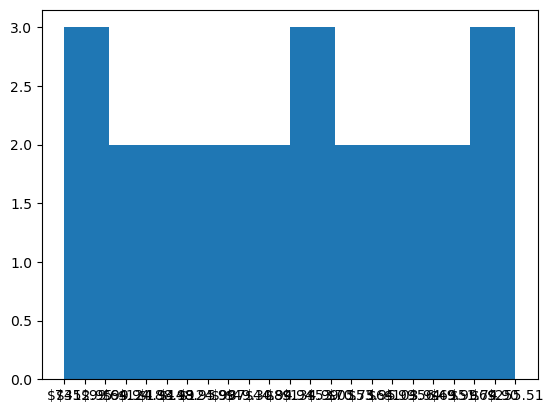

In [ ]:
import matplotlib.pyplot as plt

plt.hist(
    df[df['winery'] == ""].price
)

# df[df['winery'] == ""].price.plot(
#     type="hist"
# )

plt.show()